# Import needed library

In [115]:
import numpy as np # use to work with array available with Linear 
import matplotlib.pyplot as plt # use to plot
import pandas as pd # use to manage data
from sklearn.linear_model import LinearRegression # use related function for linear regression

## Loading data from csv into dataframe

In [116]:
data = pd.read_csv("D:\\CMP169_Artificial Intelligence\\CPU_r23_v2.csv")

In [117]:
data.head()

,manufacturer,cpuName,singleScore,multiScore,cores,threads,baseClock,turboClock,type
0,AMD,Threadripper 3990X,1262,75671,64,128,2.9,4.50,Desktop
1,AMD,Threadripper Pro 3995WX,1231,73220,64,128,2.7,4.20,Desktop
2,AMD,Epyc 7702P,993,48959,64,128,2.0,3.35,Desktop
3,AMD,Threadripper 3970X,1308,46874,32,64,3.7,4.50,Desktop
4,AMD,Threadripper Pro 3975WX,1244,43450,32,64,3.5,4.20,Desktop


In [118]:
# ratio = 0.9
# totalRows = data.shape[0]
# trainRows = int(totalRows * ratio)

In [119]:
# trainData = data[:trainRows]
# testData = data[trainRows:]

In [120]:
target = data[["singleScore"]]
features = data[["cores", "threads", "baseClock", "turboClock"]]

In [121]:
# testData = testData[["cores", "threads", "baseClock", "turboClock"]]

<Axes: title={'center': 'Single Score vs Turbo Clock'}, xlabel='turboClock', ylabel='singleScore'>

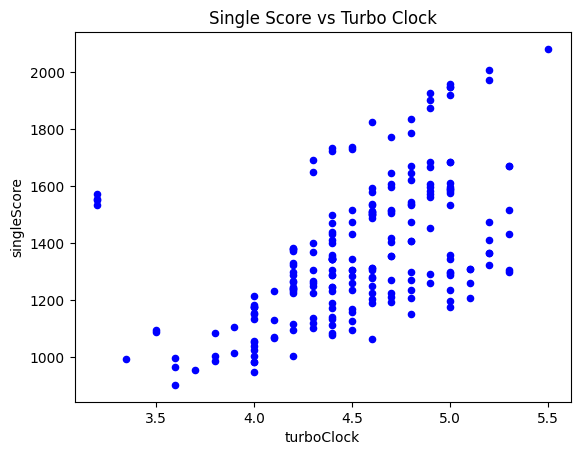

In [122]:
data.plot.scatter(x = "turboClock", y = "singleScore", color='blue', title='Single Score vs Turbo Clock')
# data.plot.scatter(x = "cores", y = "multiScore", color='green', title='Multi Score vs Cores')

# Building and train model by using Linear Regression

create a LR Model

In [123]:
lr = LinearRegression()

In [124]:
lr.fit(features, target)

LinearRegression()

In [125]:
lr.score(features, target)

0.40424353602132235

# Make prediction from ("cores", "threads", "baseClock", "turboClock")

In [126]:
# Test Data not included in datasets to test new scores
test = {
    "cores": [4, 6, 8, 2, 12, 6, 4, 8, 16, 6],
    "threads": [8, 12, 16, 4, 24, 12, 8, 16, 32, 12],
    "baseClock": [3.2, 2.8, 3.5, 2.5, 3.8, 3.2, 2.9, 3.4, 4.0, 3.1],
    "turboClock": [4.5, 4.2, 4.8, 3.8, 5.0, 4.5, 4.1, 4.6, 5.2, 4.3]
}

test = pd.DataFrame(test)


In [130]:
prediction = lr.predict(test)
prediction

array([[1332.71707305],
       [1247.99751253],
       [1420.25682429],
       [1129.92379936],
       [1477.26261361],
       [1333.11693102],
       [1215.44307581],
       [1360.80951726],
       [1535.88901975],
       [1273.66962399]])

Text(0, 0.5, 'Predicted Single Score')

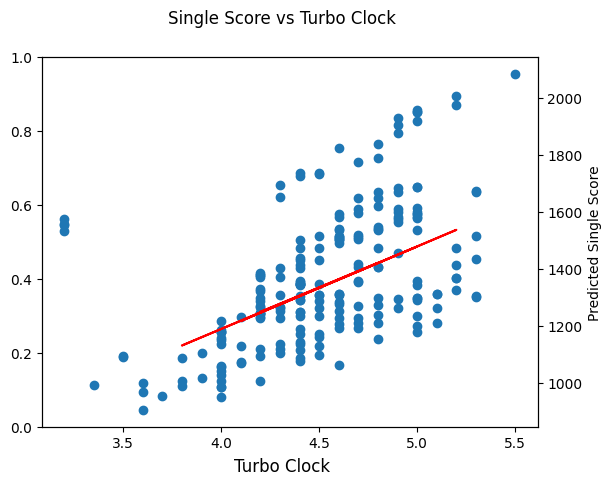

In [131]:
figure = plt.figure()
ax1 = plt.twinx()

plt.scatter(x = data["turboClock"], y = data["singleScore"])
ax1.plot(test["turboClock"], prediction[:, 0], color = "red")
plt.ylabel("single Score")
figure.suptitle("Single Score vs Turbo Clock")
figure.supxlabel("Turbo Clock")
ax1.set_ylabel("Predicted Single Score")